# Mapping Julich/Brodmann to Desikan-Killiany parcelation

This notebook maps the neuron receptor distribution presented in Zilles & Palomero (2017) to the Desikan-Killiany parcellation. Zilles & Palomero (2017) examined 44 areas that were defined using Brodmann and JuelichBrain Atlases. 

Reference:
- Zilles, K., & Palomero-Gallagher, N. (2017). Multiple transmitter receptors in regions and layers of the human cerebral cortex. Frontiers in Neuroanatomy, 11, 78. https://doi.org/10.3389/fnana.2017.00078

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

Areas mapped by Rembrandt with their respective coordinates and regions.

In [2]:
data_regions = {
  "1": {
    "coord": [-55.2,-13.3,35.3],
    "region": "postcentral"
  },
  "2":{
    "coord": [-49.7,-21.3,30.3],
    "region": "postcentral"    
  },
  "3a,3b":{
    "coord": [-39.5,-8.9,33.1],
    "region": "postcentral"    
  },
  "4":{
    "coord":[-55.3,-4.5,28.3],
    "region":"precentral"
  },
  "5L": {
    "coord": [-20.4,-27.5,58.5],
    "region": "postcentral"
  },
  "5M": {
    "coord": [-2.7,-31.8,52.9],
    "region": "paracentral"
  },
  "6":{
    "coord": [-13.3,24.9,44.3],
    "region": "caudalmiddlefrontal"
  },
  "8":{
    "coord": [-23.1,22.7,29.5],
    "region":"superiorfrontal"
  },
  "9":{
    "coord": [-13.3,60.8,8.5],
    "region":"superiorfrontal"
  },
  "10L": {
    "coord": [-14,64.5,-29.6],
    "region": "frontalpole"
  },
  "10M":{
    "coord": [-1.1,56.2,-26.8],
    "region": "frontalpole"
  },
  "11":{
    "coord": [-0.7,23.7,-41.8],
    "region":"medialorbitofrontal"
  },
  "20":{
    "coord": [-59.6,-28.5,-40],
    "region": "inferiortemporal"
  },
  "21": {
    "coord": [-67.4,-14.7,-30.8],
    "region": "middletemporal"
  },
  "22": {
    "coord": [-63.5,-0.5,-20.9],
    "region": "superiortemporal"
  },
  "23":{
    "comment":"This is actually 23D, 23V is coming",
    "coord": [-1.1,-15.8,15.1],
    "region": "posteriorcingulate"
  },
  "24":{
    "coord":[-3.2,32.4,-11],
    "region": "caudalanteriorcingulate"
  },
  "31":{
    "coord": [-1.1,-25.6,24.6],
    "region": "posteriorcingulate"
  },
  "32":{
    "coord":[-0.4,38.2,-10.6],
    "region":"rostralanteriorcingulate"
  },
  "36":{
    "coord":[-37.6,-28.3,-43.6],
    "region":"fusiform"
  },
  "37B":{
    "coord":[-55,-56.8,-31.8],
    "region":"inferiortemporal"
  },
  "37M":{
    "coord":[-38,-44.5,-33.6],
    "region":"fusiform"
  },
  "37L": {
    "coord": [-64.3,-58.3,-17.8],
    "region": "inferiortemporal"
  },
  "38": {
    "coord": [-34.4,14.5,-51.1],
    "region": "temporalpole"
  },  
  "41": {
    "coord": [-46.7,-16.8,-2.8],
    "region": "transversetemporal"
  },
  "42": {
    "coord": [-57.7,-13.2,-3.2],
    "region": "superiortemporal",
    "comment": "deep into sulcus, lateral to 41"
  },
  "44": {
    "coord": [-58.6,18.8,-6.7],
    "region": "parsopercularis"
  },
  "45": {
    "coord": [-57.9,30.8,-18.5],
    "region": "parstriangularis"
  },
  "46": {
    "coord": [-43.3,52.5,-11.6],
    "region": "rostralmiddlefrontal"
  },
  "47": {
    "coord": [-50.9,30.6,-32.5],
    "region": "parsorbitalis"
  },
  "FG1":{
    "coord":[-26.6,-59.2,-21.5],
    "region":"fusiform"
  },
  "FG2":{
    "coord":[-40.6,-66.3,-24],
    "region":"fusiform"
  },
  "PFt": {
    "coord": [-65.6,-21,17],
    "region": "supramarginal"
  },
  "PFm": {
    "coord": [-53,-42.1,37.5],
    "region": "supramarginal"
  },
  "PGa": {
    "coord": [-42.5,-64.8,31.9],
    "region": "inferiorparietal"
  },
  "PGp": {
    "coord": [-33.3,-80.9,20.2],
    "region":  "inferiorparietal"
  },
  "V1":{
    "coord":[-6.9,-81.9,3.7],
    "region": "pericalcarine"
  },
  "V2d":{
    "coord":[-0.2,-82.3,12.7],
    "region":"cuneus"
  },
  "V2v":{
    "coord":[-0.2,-86.3,3.9],
    "region":"lingual"
  },
  "V3A":{
    "coord":[-5.4,-70.6,26.2],
    "region":"superiorparietal"
  },
  "V3d":{
    "coord":[-4.5,-81.3,24],
    "region":"superiorparietal"
  },
  "V3v":{
    "coord":[-21.4,-76.7,-21.1],
    "region":"lingual"
  },
  "V4v": {
    "coord": [-36.1,-88,-20.7],
    "region": "lateraloccipital"
  }
}

In [3]:
# Data from dict to Pandas Dataframe:
julichbrain2DK = pd.DataFrame.from_dict(data_regions, orient='index')

# Drop coordinates and remark columns:
julichbrain2DK = julichbrain2DK.drop(['coord', 'comment'], axis=1)

# Convert index labels to a column. Then, rename it accordingly and set it as the new index.
julichbrain2DK = julichbrain2DK.reset_index().rename(columns={'region': 'dk_parcellation', 'index': 'julich_brain'}).\
    set_index(['dk_parcellation','julich_brain'])

## Julich/Brodmann areas contained in DK parcellation

In [4]:
julichbrain2DK.sort_index(level=0)

Empty DataFrame
Columns: []
Index: [(caudalanteriorcingulate, 24), (caudalmiddlefrontal, 6), (cuneus, V2d), (frontalpole, 10L), (frontalpole, 10M), (fusiform, 36), (fusiform, 37M), (fusiform, FG1), (fusiform, FG2), (inferiorparietal, PGa), (inferiorparietal, PGp), (inferiortemporal, 20), (inferiortemporal, 37B), (inferiortemporal, 37L), (lateraloccipital, V4v), (lingual, V2v), (lingual, V3v), (medialorbitofrontal, 11), (middletemporal, 21), (paracentral, 5M), (parsopercularis, 44), (parsorbitalis, 47), (parstriangularis, 45), (pericalcarine, V1), (postcentral, 1), (postcentral, 2), (postcentral, 3a,3b), (postcentral, 5L), (posteriorcingulate, 23), (posteriorcingulate, 31), (precentral, 4), (rostralanteriorcingulate, 32), (rostralmiddlefrontal, 46), (superiorfrontal, 8), (superiorfrontal, 9), (superiorparietal, V3A), (superiorparietal, V3d), (superiortemporal, 22), (superiortemporal, 42), (supramarginal, PFm), (supramarginal, PFt), (temporalpole, 38), (transversetemporal, 41)]

DK areas:

In [5]:
DK_areas = ['bankssts',
 'caudalanteriorcingulate',
 'caudalmiddlefrontal',
 'cuneus',
 'entorhinal',
 'fusiform',
 'inferiorparietal',
 'inferiortemporal',
 'isthmuscingulate',
 'lateraloccipital',
 'lateralorbitofrontal',
 'lingual',
 'medialorbitofrontal',
 'middletemporal',
 'parahippocampal',
 'paracentral',
 'parsopercularis',
 'parsorbitalis',
 'parstriangularis',
 'pericalcarine',
 'postcentral',
 'posteriorcingulate',
 'precentral',
 'precuneus',
 'rostralanteriorcingulate',
 'rostralmiddlefrontal',
 'superiorfrontal',
 'superiorparietal',
 'superiortemporal',
 'supramarginal',
 'frontalpole',
 'temporalpole',
 'transversetemporal',
 'insula']

## DK missing areas when mapping from Julich/Brodmann:

In [6]:
# Checking how many DK areas were not accounted
grouped_DK = julichbrain2DK.groupby(['dk_parcellation']).groups
DK_not_included = []
DK_included = []
for value in DK_areas:
    if value in grouped_DK.keys():
        DK_included.append(value)
    else:
        DK_not_included.append(value)

In [7]:
DK_not_included

['bankssts',
 'entorhinal',
 'isthmuscingulate',
 'lateralorbitofrontal',
 'parahippocampal',
 'precuneus',
 'insula']

## Neuron receptor distribution from Zilles & Palomero (2017):

In [8]:
receptor_list = ['AMPA','NMDA']
data_receptors = pd.read_excel('receptor-distribution-multitabs.xlsx', sheet_name=receptor_list, index_col=0, header=0)

# layer depths
layer = ['supragranular', 'SD', 'granular', 'SD.1', 'infragranular', 'SD.2']

Extracting AMPA and NMDA distributions:

In [9]:
data_receptors['AMPA'].index = data_receptors['AMPA'].index.astype(str) # it garantees that all labels are strings
ampa_dist = julichbrain2DK.join(data_receptors['AMPA'][layer], on='julich_brain')

data_receptors['NMDA'].index = data_receptors['NMDA'].index.astype(str) # it garantees that all labels are strings
nmda_dist = julichbrain2DK.join(data_receptors['NMDA'][layer], on='julich_brain')

## Calculating the NMDA to AMPA ratios

In [10]:
# Define specific columns
specific_columns = ['supragranular', 'granular', 'infragranular']  # columns to calculate the ratio

# Calculate NMDA to AMPA ratios
nmda_to_ampa = nmda_dist[specific_columns] / ampa_dist[specific_columns]

# Define columns for standard deviations
specific_columns_std = ['SD', 'SD.1', 'SD.2']

# Calculate the propagated error for the standard deviations
nmda_std = nmda_dist[specific_columns_std]
ampa_std = ampa_dist[specific_columns_std]

# Map ratio columns to their corresponding SD columns
column_pairs = {
    'supragranular': ('SD', 'SD'),      # NMDA_SD_col, AMPA_SD_col
    'granular': ('SD.1', 'SD.1'),       # Adjust if AMPA SDs differ
    'infragranular': ('SD.2', 'SD.2')   # e.g., ('SD.2', 'SD.3')
}

nmda_to_ampa_std = pd.DataFrame(index=nmda_to_ampa.index, columns=specific_columns)
for ratio_col, (nmda_sd_col, ampa_sd_col) in column_pairs.items():
    nmda_vals = nmda_dist[ratio_col]
    ampa_vals = ampa_dist[ratio_col]
    nmda_sd = nmda_dist[nmda_sd_col]
    ampa_sd = ampa_dist[ampa_sd_col]
    
    nmda_to_ampa_std[ratio_col] = (nmda_vals / ampa_vals) * np.sqrt(
        (nmda_sd / nmda_vals)**2 + (ampa_sd / ampa_vals)**2
    )

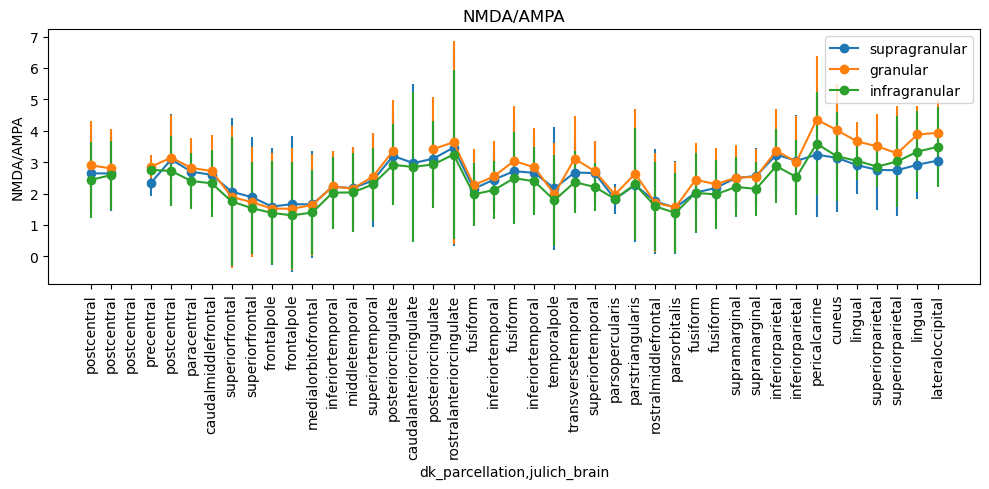

In [11]:
ax = nmda_to_ampa.plot(marker='o', yerr=nmda_to_ampa_std, figsize=[10,5], title='NMDA/AMPA')
ax.set_ylabel('NMDA/AMPA')
ax.set_xticks(range(len(nmda_to_ampa.index)))
ax.set_xticklabels(nmda_to_ampa.index.get_level_values(0), rotation=90)
plt.tight_layout();

## Additional transmitter receptor distributions (not layer resolved)

This data was additionally sent by Nicola Palomero after we asked info about missing areas. However, the data presents only the distribution per region.

### Load data

In [12]:
# Read the additional receptor data
additional_data_receptors = pd.read_excel('additional_receptors_20230706.xlsm', usecols=['Area'] + receptor_list)

# Separate the standard deviation rows
sd_rows = additional_data_receptors[additional_data_receptors['Area'].str.contains('s.d.')]

# Remove the 's.d.' from the Area names in the standard deviation rows
sd_rows['Area'] = sd_rows['Area'].str.replace(' s.d.', '')

# Rename the columns to indicate they are standard deviations
sd_rows = sd_rows.rename(columns={receptor: f'{receptor}_SD' for receptor in receptor_list})

# Merge the standard deviation rows with the original data
additional_data_receptors = additional_data_receptors[~additional_data_receptors['Area'].str.contains('s.d.')]
additional_data_receptors = additional_data_receptors.merge(sd_rows, on='Area', how='left')

# Rename 'Area' column to 'julich_brain'
additional_data_receptors = additional_data_receptors.rename(columns={'Area': 'julich_brain'})

# Set the julich_brain column as the index
additional_data_receptors = additional_data_receptors.set_index('julich_brain')
additional_data_receptors

/tmp/ipykernel_264100/4126778008.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_rows['Area'] = sd_rows['Area'].str.replace(' s.d.', '')


,AMPA,NMDA,AMPA_SD,NMDA_SD
julich_brain,,,,
area 36 parahippocampal,430.864224,1350.861639,102.966451,260.424530
area v23,451.133256,1222.842337,104.665670,276.465841
area 29,343.797046,992.448825,78.426992,147.240995
area 30,304.731148,1066.472700,88.131427,97.858456
area 7ma precuneus,508.447161,1258.630972,202.348066,255.318134
area 7mp precuneus,508.447161,1258.630972,172.160602,467.855958
area Fo4 lateral orbital,394.112460,1110.847477,115.360579,447.982389
area aINS,392.136074,1375.451926,178.627277,416.379767
entorhinal,670.780000,887.677400,365.532345,467.385435


### Get NMDA/AMPA ratios and their respective standard deviations

In [13]:
# Get the NMDA/AMPA ratio
additional_data_receptors['NMDA/AMPA'] = additional_data_receptors['NMDA'] / additional_data_receptors['AMPA']

# Get the standard deviation of the NMDA/AMPA ratio
additional_data_receptors['NMDA/AMPA_SD'] = additional_data_receptors['NMDA/AMPA'] * np.sqrt(
	(additional_data_receptors['NMDA_SD'] / additional_data_receptors['NMDA'])**2 +
	(additional_data_receptors['AMPA_SD'] / additional_data_receptors['AMPA'])**2
)

In [14]:
additional_data_receptors

,AMPA,NMDA,AMPA_SD,NMDA_SD,NMDA/AMPA,NMDA/AMPA_SD
julich_brain,,,,,,
area 36 parahippocampal,430.864224,1350.861639,102.966451,260.424530,3.135237,0.962653
area v23,451.133256,1222.842337,104.665670,276.465841,2.710601,0.878089
area 29,343.797046,992.448825,78.426992,147.240995,2.886729,0.785539
area 30,304.731148,1066.472700,88.131427,97.858456,3.499717,1.061876
area 7ma precuneus,508.447161,1258.630972,202.348066,255.318134,2.475441,1.105755
area 7mp precuneus,508.447161,1258.630972,172.160602,467.855958,2.475441,1.244694
area Fo4 lateral orbital,394.112460,1110.847477,115.360579,447.982389,2.818605,1.404541
area aINS,392.136074,1375.451926,178.627277,416.379767,3.507588,1.918438
entorhinal,670.780000,887.677400,365.532345,467.385435,1.323351,1.002770


### Mapping to DK areas (done by hand - To be checked)

In [15]:
area_mapping = {
    'area 36 parahippocampal': 'parahippocampal',
    'entorhinal': 'parahippocampal',
    'area 29': 'isthmuscingulate',
    'area 30': 'isthmuscingulate',
    'area 7ma precuneus': 'precuneus',
    'area 7mp precuneus': 'precuneus',
    'area Fo4 lateral orbital': 'lateralorbitofrontal',
    'area aINS': 'insula'
}


In [16]:
# Map the areas to their corresponding DK parcellation
additional_data_receptors['dk_parcellation'] = additional_data_receptors.index.map(area_mapping)

# Drop rows where the index name is NaN
additional_data_receptors = additional_data_receptors.dropna(subset=['dk_parcellation'])

# Set the DK parcellation as the index together with the area name
additional_data_receptors = additional_data_receptors.set_index('dk_parcellation', append=True)

# Display the updated DataFrame
additional_data_receptors

,,AMPA,NMDA,AMPA_SD,NMDA_SD,NMDA/AMPA,NMDA/AMPA_SD
julich_brain,dk_parcellation,,,,,,
area 36 parahippocampal,parahippocampal,430.864224,1350.861639,102.966451,260.424530,3.135237,0.962653
area 29,isthmuscingulate,343.797046,992.448825,78.426992,147.240995,2.886729,0.785539
area 30,isthmuscingulate,304.731148,1066.472700,88.131427,97.858456,3.499717,1.061876
area 7ma precuneus,precuneus,508.447161,1258.630972,202.348066,255.318134,2.475441,1.105755
area 7mp precuneus,precuneus,508.447161,1258.630972,172.160602,467.855958,2.475441,1.244694
area Fo4 lateral orbital,lateralorbitofrontal,394.112460,1110.847477,115.360579,447.982389,2.818605,1.404541
area aINS,insula,392.136074,1375.451926,178.627277,416.379767,3.507588,1.918438
entorhinal,parahippocampal,670.780000,887.677400,365.532345,467.385435,1.323351,1.002770


### Approximate missing values and combine with original data

In [17]:
# Create a new dataframe with the additional NMDA/AMPA ratios
additional_ratios = additional_data_receptors[['NMDA/AMPA']].rename(columns={'NMDA/AMPA': 'infragranular'})

# Repeat the NMDA/AMPA values for all layers
for layer in ['supragranular', 'granular']:
	additional_ratios[layer] = additional_ratios['infragranular']

# Join the additional ratios with the existing nmda_to_ampa dataframe
nmda_to_ampa_combined = nmda_to_ampa.combine_first(additional_ratios)

# Create a new dataframe with the additional NMDA/AMPA standard deviations
additional_ratios_std = additional_data_receptors[['NMDA/AMPA_SD']].rename(columns={'NMDA/AMPA_SD': 'infragranular'})

# Repeat the NMDA/AMPA standard deviation values for all layers
for layer in ['supragranular', 'granular']:
	additional_ratios_std[layer] = additional_ratios_std['infragranular']

# Join the additional standard deviations with the existing nmda_to_ampa_std dataframe
nmda_to_ampa_std_combined = nmda_to_ampa_std.combine_first(additional_ratios_std)

In [18]:
# caudalanteriorcingulate has one missing value in the NMDA/AMPA ratio
# The approach here is to calculate the average of the other two layers
# and assign it to the missing value
# TODO: find a better way to fill this missing value

# Calculate the average of the other two layers
average_value = nmda_to_ampa_combined.loc[('caudalanteriorcingulate', '24'), ['supragranular', 'infragranular']].mean()
nmda_to_ampa_combined.loc[('caudalanteriorcingulate', '24'), 'granular'] = average_value

# Calculate the average of the other two layers for the standard deviation
average_std = nmda_to_ampa_std_combined.loc[('caudalanteriorcingulate', '24'), ['supragranular', 'infragranular']].mean()
nmda_to_ampa_std_combined.loc[('caudalanteriorcingulate', '24'), 'granular'] = average_std

In [19]:
# bankssts has no values for NMDA/AMPA ratio and standard deviation
# The approach here is to get the median of the other areas and assign it to all layers in bankssts
# TODO: find a better way to fill these missing values

# Add bankssts to the dataframe
nmda_to_ampa_combined.loc[('bankssts', '-'), :] = nmda_to_ampa_combined.median()
nmda_to_ampa_std_combined.loc[('bankssts', '-'), :] = nmda_to_ampa_std_combined.median()

### Averaging across Julich/Brodmann areas contained into DK

Here we can check how neuron receptor distribution values for multiple areas contained in DK vary by averaging and calculating the standard deviation.

In [20]:
# Group the ratios by DK areas and average the Jülich brain areas within each DK area
nmda_to_ampa_grouped_to_DK = nmda_to_ampa_combined.groupby('dk_parcellation').mean()

# Group the standard deviations by DK areas and calculate the standard deviation of the mean for each DK area
nmda_to_ampa_std_grouped_to_DK = nmda_to_ampa_std_combined.groupby('dk_parcellation').apply(lambda x: np.sqrt((x**2).mean()))

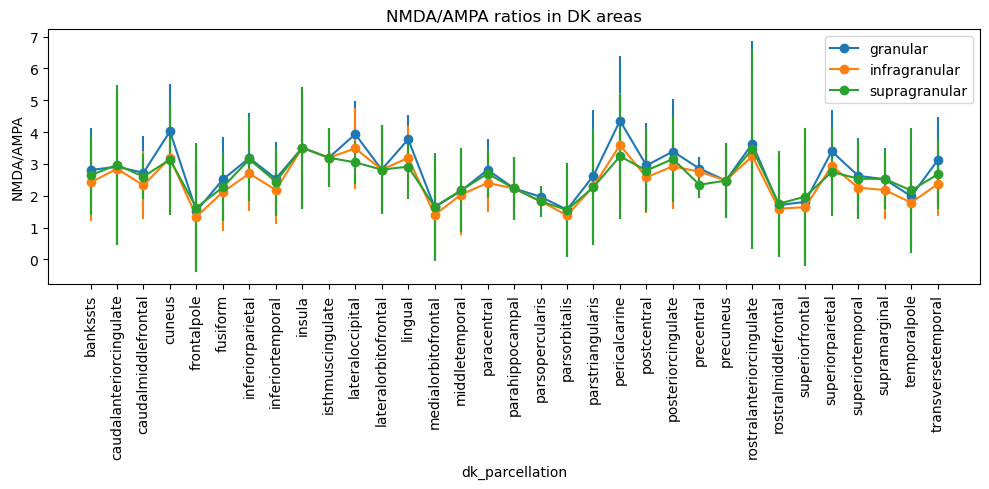

In [21]:
ax = nmda_to_ampa_grouped_to_DK.plot(marker='o', yerr=nmda_to_ampa_std_grouped_to_DK, figsize=[10,5], title='NMDA/AMPA ratios in DK areas')
ax.set_ylabel('NMDA/AMPA')
ax.set_xticks(range(len(nmda_to_ampa_grouped_to_DK.index)))
ax.set_xticklabels(nmda_to_ampa_grouped_to_DK.index.get_level_values(0), rotation=90)
plt.tight_layout();

In [22]:
# gross ordering of the brain into four lobes
right_ordering_four_lobes = {
    # Occipital Lobe
    'cuneus': 'occipital',
    'lateraloccipital': 'occipital',
    'lingual': 'occipital',
    'pericalcarine': 'occipital',

    # Temporal Lobe
    'superiortemporal': 'temporal',
    'middletemporal': 'temporal',
    'inferiortemporal': 'temporal',
    'entorhinal': 'temporal',
    'parahippocampal': 'temporal',
    'temporalpole': 'temporal',
    'transversetemporal': 'temporal',
    'bankssts': 'temporal',
    'fusiform': 'temporal',  # Note: fusiform can be considered part of both occipital and temporal lobes
    'insula': 'temporal',  # Included with temporal lobe in this coarse division


    # Parietal Lobe
    'precuneus': 'parietal',
    'supramarginal': 'parietal',
    'inferiorparietal': 'parietal',
    'superiorparietal': 'parietal',
    'postcentral': 'parietal',
    'posteriorcingulate': 'parietal',  # Often associated with parietal lobe functions
    'isthmuscingulate': 'parietal',  # Can be considered part of parietal lobe

    # Frontal Lobe
    'medialorbitofrontal': 'frontal',
    'lateralorbitofrontal': 'frontal',
    'parsopercularis': 'frontal',
    'parsorbitalis': 'frontal',
    'parstriangularis': 'frontal',
    'rostralmiddlefrontal': 'frontal',
    'caudalmiddlefrontal': 'frontal',
    'superiorfrontal': 'frontal',
    'frontalpole': 'frontal',
    'precentral': 'frontal',
    'paracentral': 'frontal', # check this one
    'rostralanteriorcingulate': 'frontal',  # Associated with frontal lobe functions
    'caudalanteriorcingulate': 'frontal'  # Associated with frontal lobe functions
}

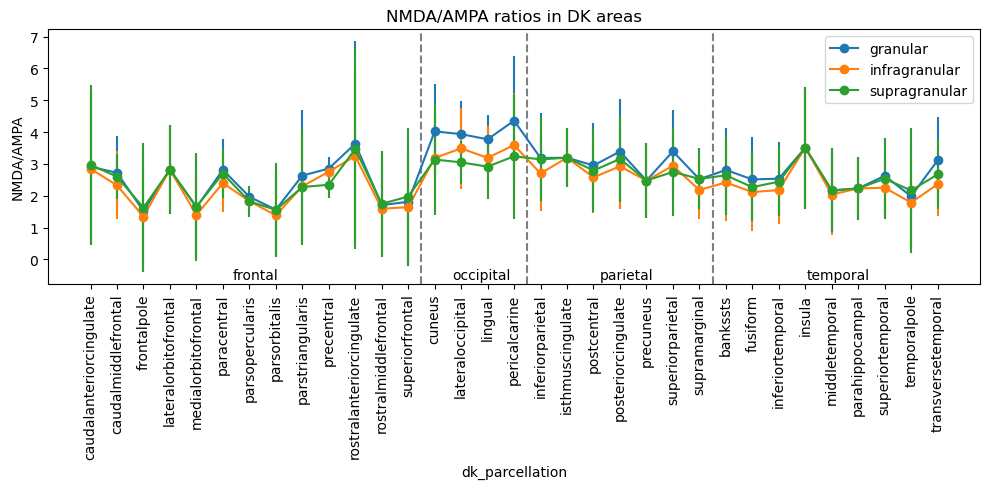

In [23]:
# Create a DataFrame to map each area to its corresponding lobe
lobes_df = pd.DataFrame.from_dict(right_ordering_four_lobes, orient='index', columns=['lobe'])

# Join the lobe information with the NMDA to AMPA ratios
nmda_to_ampa_with_lobes = nmda_to_ampa_grouped_to_DK.join(lobes_df, how='left')

# Sort the DataFrame by lobe and then by area within each lobe
nmda_to_ampa_with_lobes_sorted = nmda_to_ampa_with_lobes.sort_values(by=['lobe', 'dk_parcellation'])

# Plot the sorted DataFrame
ax = nmda_to_ampa_with_lobes_sorted.drop(columns='lobe').plot(marker='o', yerr=nmda_to_ampa_std_grouped_to_DK, figsize=[10,5], title='NMDA/AMPA ratios in DK areas')
ax.set_ylabel('NMDA/AMPA')
ax.set_xticks(range(len(nmda_to_ampa_with_lobes_sorted.index)))
ax.set_xticklabels(nmda_to_ampa_with_lobes_sorted.index.get_level_values(0), rotation=90)

# Add vertical lines and text labels to differentiate lobes
current_lobe = nmda_to_ampa_with_lobes_sorted['lobe'].iloc[0]
lobe_start_index = 0
for i, lobe in enumerate(nmda_to_ampa_with_lobes_sorted['lobe']):
    if lobe != current_lobe:
        ax.axvline(x=i-0.5, color='gray', linestyle='--')
        # Add text label for the lobe at the bottom
        ax.text((lobe_start_index + i - 0.5) / 2, ax.get_ylim()[0]+0.5, current_lobe, ha='center', va='top', fontsize=10, color='black')
        current_lobe = lobe
        lobe_start_index = i

# Add text label for the last lobe at the bottom
ax.text((lobe_start_index + len(nmda_to_ampa_with_lobes_sorted) - 0.5) / 2, ax.get_ylim()[0]+0.5, current_lobe, ha='center', va='top', fontsize=10, color='black')

plt.tight_layout()

## Save to file

Format the data to save to a file which will be loaded in the model code.

### Group into layers as it is in the model (2/3, 4, 5, 6)

In [24]:
# The model has four layers: ['II/III', 'IV', 'V', 'VI']
# Group the layers into the following categories:
layer_mapping = {
	'II/III': ['supragranular'],
	'IV': ['granular'],
	'V': ['infragranular'],
	'VI': ['infragranular']
}

In [25]:
# Group the layers according to the mapping
# Rename the columns using the mapping
nmda_to_ampa_grouped_to_DK = nmda_to_ampa_grouped_to_DK.rename(columns={'supragranular': 'II/III', 'granular': 'IV', 'infragranular': 'V'})

# Add the 'VI' layer, which is the same as the 'V' layer
nmda_to_ampa_grouped_to_DK['VI'] = nmda_to_ampa_grouped_to_DK['V']

# Group the standard deviations into the same categories
# Rename the columns using the mapping
nmda_to_ampa_std_grouped_to_DK = nmda_to_ampa_std_grouped_to_DK.rename(columns={'supragranular': 'II/III', 'granular': 'IV', 'infragranular': 'V'})

# Add the 'VI' layer, which is the same as the 'V' layer
nmda_to_ampa_std_grouped_to_DK['VI'] = nmda_to_ampa_std_grouped_to_DK['V']

# Rename dk_parcellation to "area"
nmda_to_ampa_grouped_to_DK = nmda_to_ampa_grouped_to_DK.reset_index().rename(columns={'dk_parcellation': 'area'}).set_index('area')
nmda_to_ampa_std_grouped_to_DK = nmda_to_ampa_std_grouped_to_DK.reset_index().rename(columns={'dk_parcellation': 'area'}).set_index('area')

In [26]:
nmda_to_ampa_grouped_to_DK.stack()

area                           
bankssts                 IV        2.808651
                         V         2.417218
                         II/III    2.642011
                         VI        2.417218
caudalanteriorcingulate  IV        2.908260
                                     ...   
temporalpole             VI        1.783115
transversetemporal       IV        3.111413
                         V         2.362398
                         II/III    2.670232
                         VI        2.362398
Length: 132, dtype: float64

In [27]:
# Define the population list
population_list = ['E', 'I']

# Create a MultiIndex from the area, layer, and population lists
multi_index = pd.MultiIndex.from_product(
    [nmda_to_ampa_grouped_to_DK.index, nmda_to_ampa_grouped_to_DK.columns, population_list],
    names=['area', 'layer', 'population']
)

# Flatten the DataFrame to match the MultiIndex structure
flattened_data = nmda_to_ampa_grouped_to_DK.stack().values

# Create the Series with the MultiIndex
nmda_to_ampa_ratio = pd.Series(
    data=np.repeat(flattened_data, len(population_list)),  # Repeat the data for each population
    index=multi_index,
    dtype=np.float64
)

# Display the Series
print(nmda_to_ampa_ratio)

area                layer   population
bankssts            IV      E             2.808651
                            I             2.808651
                    V       E             2.417218
                            I             2.417218
                    II/III  E             2.642011
                                            ...   
transversetemporal  V       I             2.362398
                    II/III  E             2.670232
                            I             2.670232
                    VI      E             2.362398
                            I             2.362398
Length: 264, dtype: float64


In [28]:
# Save to file:
nmda_to_ampa_ratio.to_csv('nmda_to_ampa_ratio.csv')

In [29]:
# load to test
nmda_to_ampa_ratio_test = pd.read_csv('nmda_to_ampa_ratio.csv', index_col=[0,1,2])
nmda_to_ampa_ratio_test

0
area               layer  population          
bankssts           IV     E           2.808651
                          I           2.808651
                   V      E           2.417218
                          I           2.417218
                   II/III E           2.642011
...                                        ...
transversetemporal V      I           2.362398
                   II/III E           2.670232
                          I           2.670232
                   VI     E           2.362398
                          I           2.362398

[264 rows x 1 columns]